In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading in data sets
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [3]:
red_df = pd.read_csv(red_url, sep=';')
white_df = pd.read_csv(white_url, sep=';')

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Making a column for red and white
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [7]:
#Combining both data sets
wine_combined = pd.concat([red_df, white_df], axis=0)

In [8]:
#Making sure their both in there
wine_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
#Features and target
X = wine_combined.drop(['quality', 'wine_type'], axis=1)
y = wine_combined['quality']
#Splitting for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Training the rfc model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [11]:
# Calling predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [12]:
#Lets look at the numbers
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
balanced_test = balanced_accuracy_score(y_test, y_test_pred)
print(f'\nRandom Forest \nTrain Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\nBalanced Test Score: {balanced_test}')


Random Forest 
Train Accuracy: 1.0
Test Accuracy: 0.68
Balanced Test Score: 0.3621456137178623


In [13]:
#looking for the best features
importances = rf.feature_importances_
importances_sorted = sorted(zip(importances, X.columns), reverse=True)
print("Top 10 Important Features:")
for importance, feature in importances_sorted[:11]:
    print(f"{feature}: {importance:.4f}")

Top 10 Important Features:
alcohol: 0.1266
volatile acidity: 0.1010
density: 0.1007
total sulfur dioxide: 0.0913
sulphates: 0.0864
chlorides: 0.0863
free sulfur dioxide: 0.0858
pH: 0.0844
residual sugar: 0.0844
citric acid: 0.0793
fixed acidity: 0.0739


In [14]:
#Consider dropping the last 3? Maybe just last 2 actually.

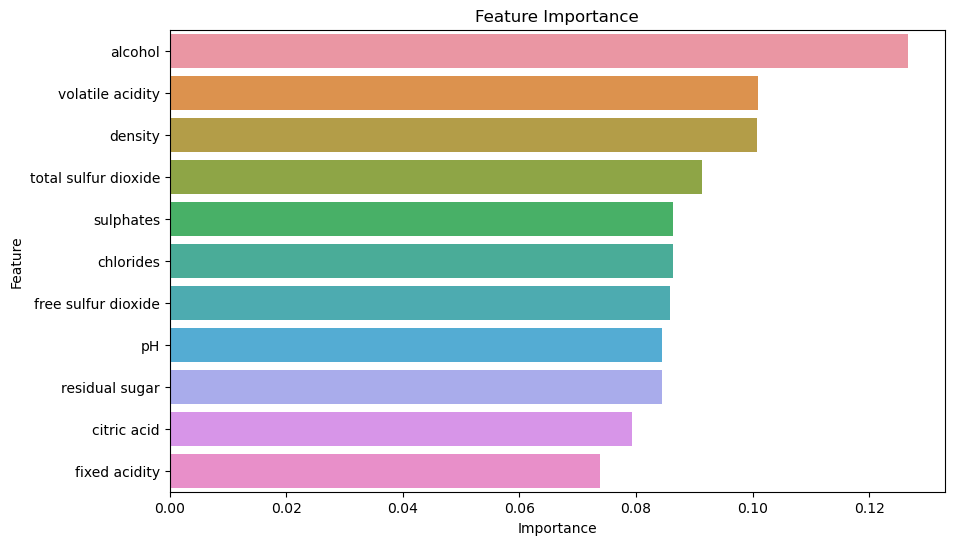

In [15]:
#Added a graph, not sure if we will want/need this for the presentation
feature_importance_df = pd.DataFrame(importances_sorted, columns=['Importance', 'Feature']).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [16]:
#Grid parameters
#param_grid = {
    #'n_estimators': [200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
#}

In [17]:
#Searching then fitting grid, looking at the numbers
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print(f'Best Parameters: {best_params}')
#print(f'Best Score: {best_score}')

In [18]:
#Nick noted that if instead of trying to predict the number 1-10 for quality. Maybe instead create bins for
#poor, ok, and good quality. So that we are doing 1-3 instead of 1-10.

C:\Users\dazzi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Random Forest with Best Parameters 
Train Accuracy: 1.0
Test Accuracy: 0.6807692307692308
Balanced Test Score: 0.357350553365163
Top 10 Important Features (Best Model):
alcohol: 0.1277
volatile acidity: 0.1008
density: 0.1006
total sulfur dioxide: 0.0912
chlorides: 0.0869
sulphates: 0.0865
free sulfur dioxide: 0.0857
pH: 0.0848
residual sugar: 0.0839
citric acid: 0.0783


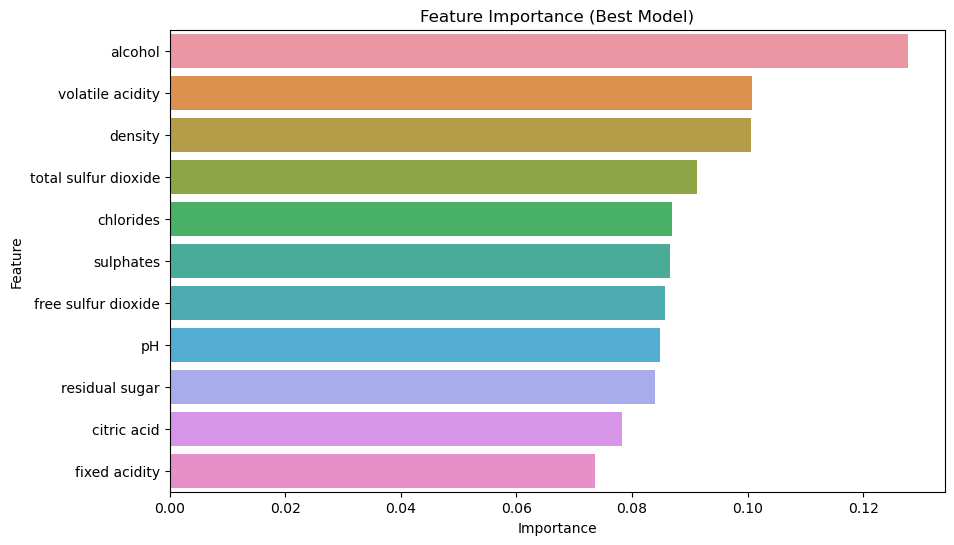

In [19]:
# Adding the reccomended parameters from the grid search
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
rf_best.fit(X_train, y_train)

y_train_pred_best = rf_best.predict(X_train)
y_test_pred_best = rf_best.predict(X_test)

train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
balanced_test_score_best = balanced_accuracy_score(y_test, y_test_pred_best)

print(f'\nRandom Forest with Best Parameters \nTrain Accuracy: {train_accuracy_best}\nTest Accuracy: {test_accuracy_best}\nBalanced Test Score: {balanced_test_score_best}')

importances_best = rf_best.feature_importances_

importances_sorted_best = sorted(zip(importances_best, X.columns), reverse=True)

print("Top 10 Important Features (Best Model):")
for importance, feature in importances_sorted_best[:10]:
    print(f"{feature}: {importance:.4f}")

feature_importance_df_best = pd.DataFrame(importances_sorted_best, columns=['Importance', 'Feature']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_best)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Best Model)')
plt.show()
